In [200]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [201]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [202]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [203]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [204]:
train_df.dtypes[train_df.dtypes != "object"]

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

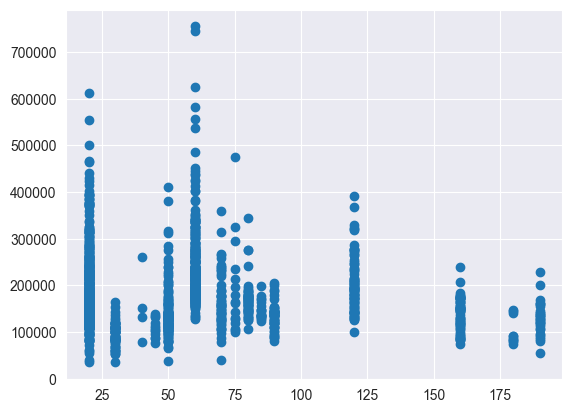

In [205]:
#MSSubClass je class budovy poschodia/novost domu...
plt.scatter(x= "MSSubClass", y = "SalePrice", data = train_df)

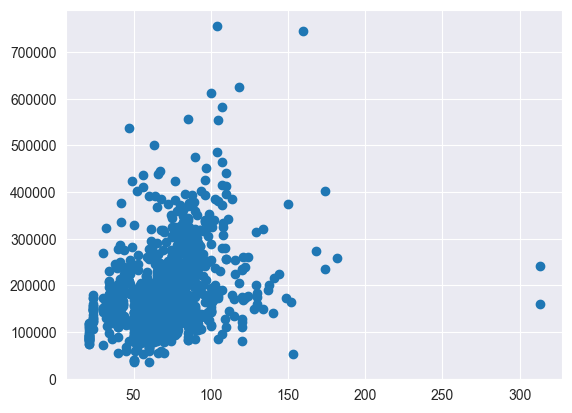

In [206]:
#LotFrontage je priamy kontakt pozemku s ulicou
plt.scatter(x= "LotFrontage", y = "SalePrice", data = train_df)

In [207]:
train_df.query("LotFrontage > 300")
#drop 935, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


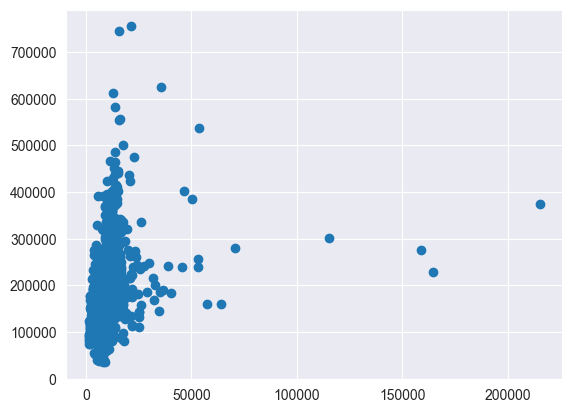

In [208]:
#LotArea je celkovy pozemok
plt.scatter(x= "LotArea", y = "SalePrice", data = train_df)

In [209]:
train_df.query("LotArea > 55000")
#drop 250, 314,336, 707
#maybe 1397

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [210]:
stats.zscore(train_df["LotArea"]).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

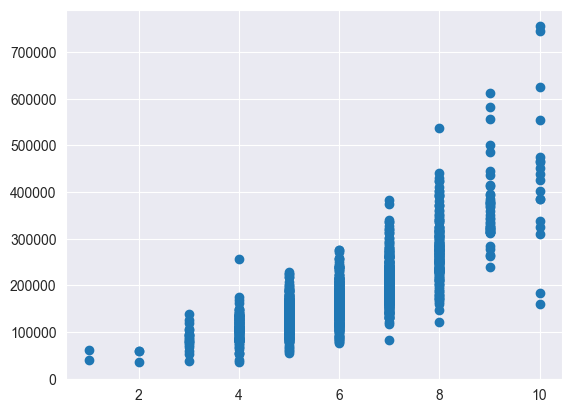

In [211]:
plt.scatter(x= "OverallQual", y = "SalePrice", data = train_df)

In [212]:
train_df.query("OverallQual == 10")
#maybe 524

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


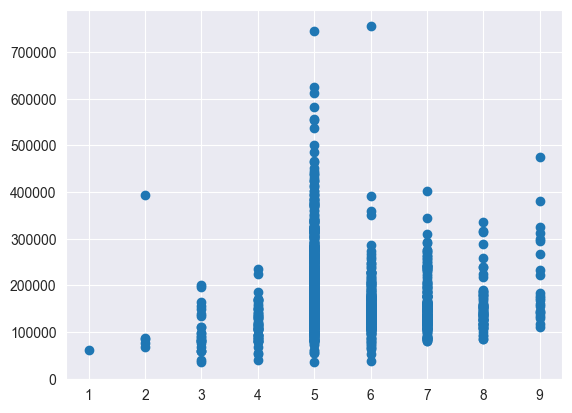

In [213]:
plt.scatter(x= "OverallCond", y = "SalePrice", data = train_df)

In [214]:
train_df.query("OverallCond == 2")
#drop 379

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [215]:
train_df.query("OverallCond == 6").sort_values("SalePrice", ascending =False)
#drop 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
688,689,20,RL,60.0,8089,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,392000
608,609,70,RL,78.0,12168,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Alloca,359100
654,655,20,RL,91.0,10437,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,350000
1024,1025,20,RL,NaN,15498,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,COD,Abnorml,287000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,30,30,RM,60.0,6324,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,68500
874,875,50,RM,52.0,5720,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,66500
1432,1433,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,64500
710,711,30,RL,56.0,4130,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,52000


In [216]:
train_df.query("OverallCond == 5").sort_values("SalePrice", ascending =False)
#drop 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,463,20,RL,60.0,8281,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,12,2009,WD,Normal,62383
1100,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,60000
812,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993
705,706,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000


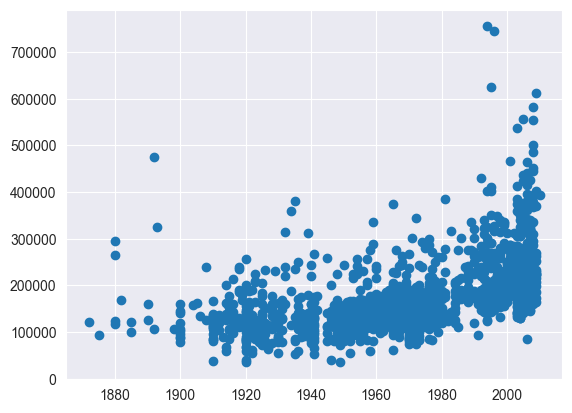

In [217]:
plt.scatter(x= "YearBuilt", y = "SalePrice", data = train_df)

In [218]:
train_df.query("YearBuilt <  1900 & SalePrice > 400000").sort_values("SalePrice", ascending =False)
#drop 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


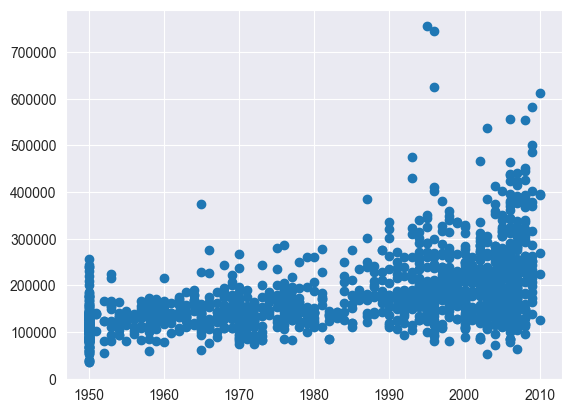

In [219]:
plt.scatter(x= "YearRemodAdd", y = "SalePrice", data = train_df)

In [220]:
train_df.query("YearRemodAdd <  1970 & SalePrice > 300000").sort_values("SalePrice", ascending =False)
#drop 314

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


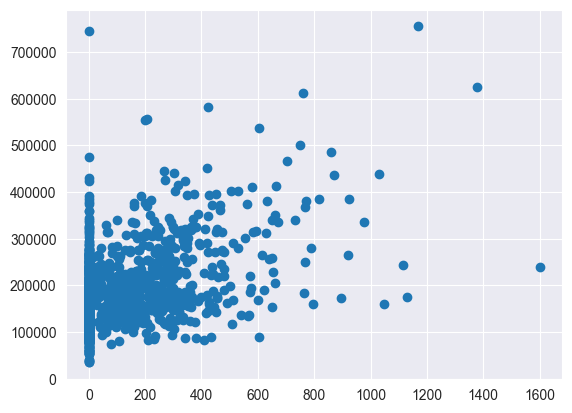

In [221]:
plt.scatter(x= "MasVnrArea", y = "SalePrice", data = train_df)

In [222]:
train_df.query("MasVnrArea >  1500").sort_values("SalePrice", ascending =False)
# drop 298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


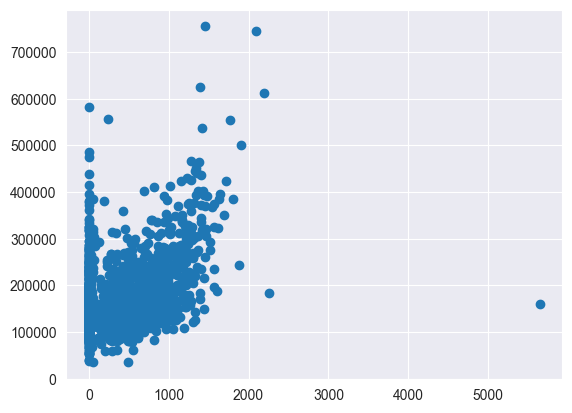

In [223]:
plt.scatter(x= "BsmtFinSF1", y = "SalePrice", data = train_df)

In [224]:
train_df.query("BsmtFinSF1 >  4000").sort_values("SalePrice", ascending =False)
#drop 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


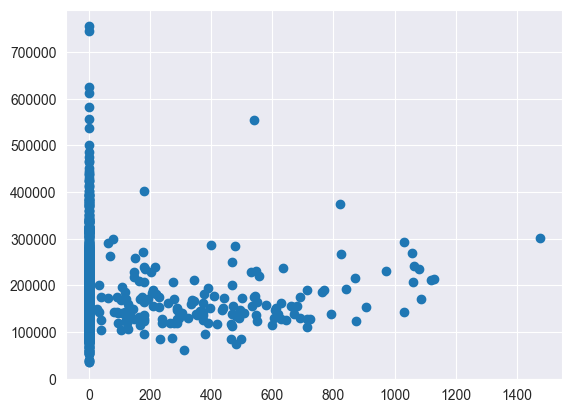

In [225]:
plt.scatter(x= "BsmtFinSF2", y = "SalePrice", data = train_df)

In [226]:
train_df.query("BsmtFinSF2 >  1400").sort_values("SalePrice", ascending =False)
#drop 323

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,323,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000


In [227]:
train_df.query("BsmtFinSF2 >  400 & SalePrice > 500000").sort_values("SalePrice", ascending =False)
# drop 441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


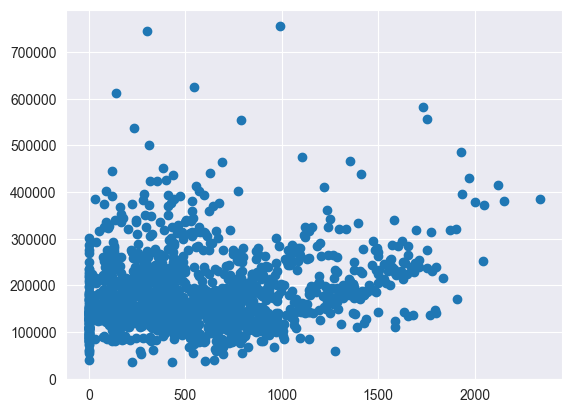

In [228]:
plt.scatter(x= "BsmtUnfSF", y = "SalePrice", data = train_df)

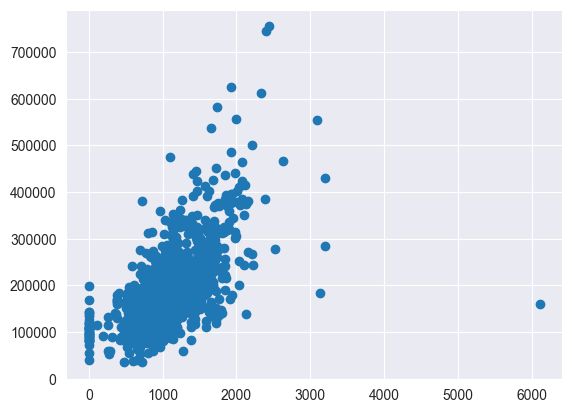

In [229]:
plt.scatter(x= "TotalBsmtSF", y = "SalePrice", data = train_df)

In [230]:
train_df.query("TotalBsmtSF >  5000").sort_values("SalePrice", ascending =False)
#drop 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


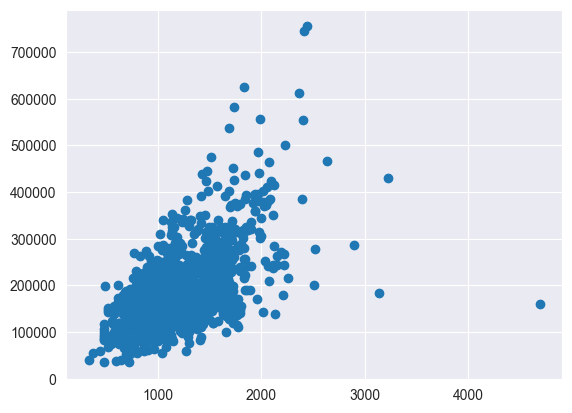

In [231]:
plt.scatter(x= "1stFlrSF", y = "SalePrice", data = train_df)

In [232]:
train_df.query("`1stFlrSF` > 4000").sort_values("SalePrice", ascending =False)
# drop 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


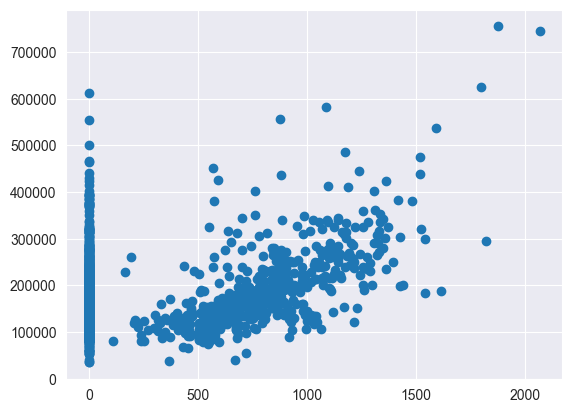

In [233]:
plt.scatter(x= "2ndFlrSF", y = "SalePrice", data = train_df)

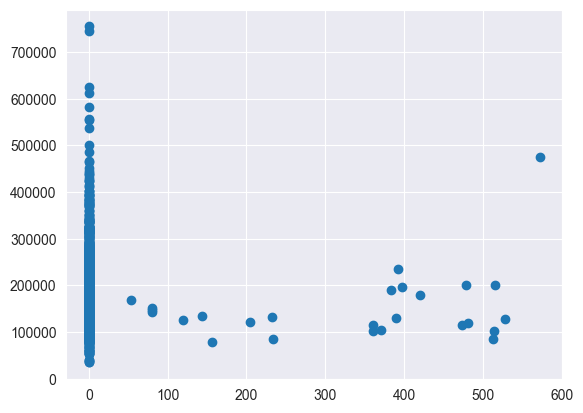

In [234]:
plt.scatter(x= "LowQualFinSF", y = "SalePrice", data = train_df)

In [235]:
train_df.query("`LowQualFinSF` > 550").sort_values("SalePrice", ascending =False)
# drop 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


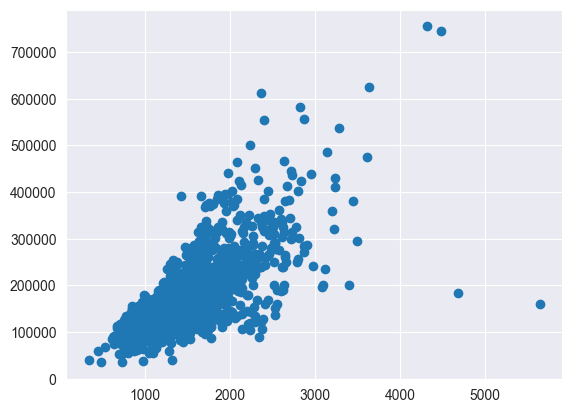

In [236]:
plt.scatter(x= "GrLivArea", y = "SalePrice", data = train_df)

In [237]:
train_df.query("`GrLivArea` > 4500").sort_values("SalePrice", ascending =False)
# drop 524, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


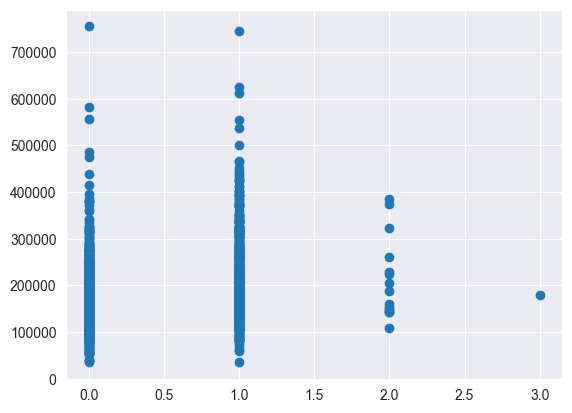

In [238]:
plt.scatter(x= "BsmtFullBath", y = "SalePrice", data = train_df)

In [239]:
train_df.query("BsmtFullBath == 3").sort_values("SalePrice", ascending =False)
# drop 739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


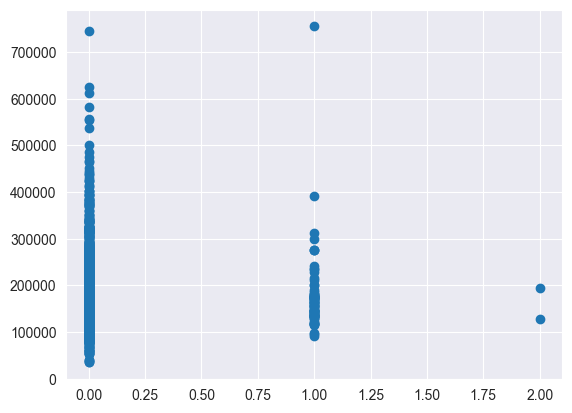

In [240]:
plt.scatter(x= "BsmtHalfBath", y = "SalePrice", data = train_df)

In [241]:
train_df.query("BsmtHalfBath == 1 & SalePrice > 700000").sort_values("SalePrice", ascending =False)
# drop 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [242]:
train_df.query("BsmtHalfBath == 2").sort_values("SalePrice", ascending =False)
# drop 598, 955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


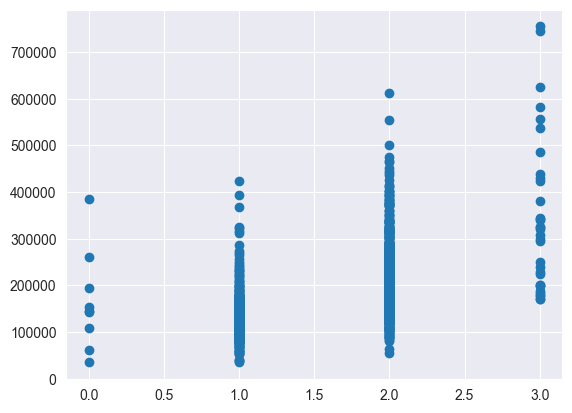

In [243]:
plt.scatter(x= "FullBath", y = "SalePrice", data = train_df)

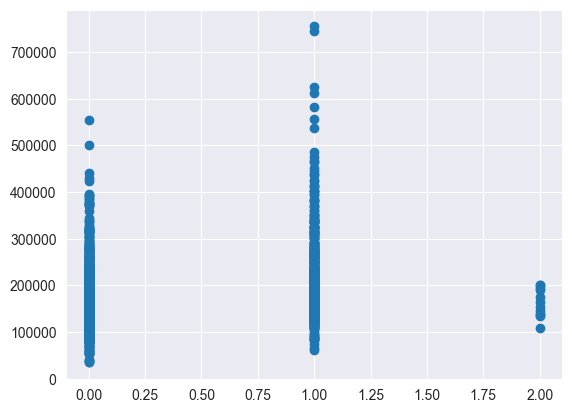

In [244]:
plt.scatter(x= "HalfBath", y = "SalePrice", data = train_df)

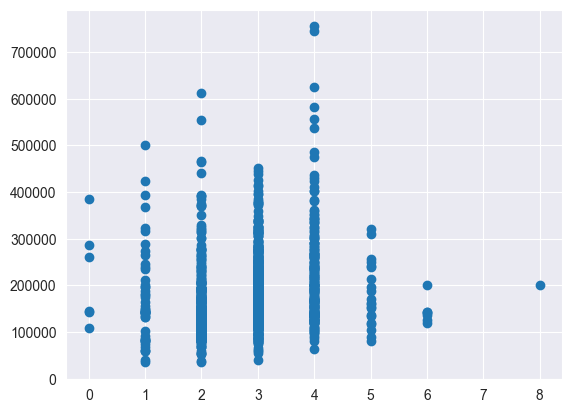

In [245]:
plt.scatter(x= "BedroomAbvGr", y = "SalePrice", data = train_df)

In [246]:
train_df.query("BedroomAbvGr == 8").sort_values("SalePrice", ascending =False)
# drop 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


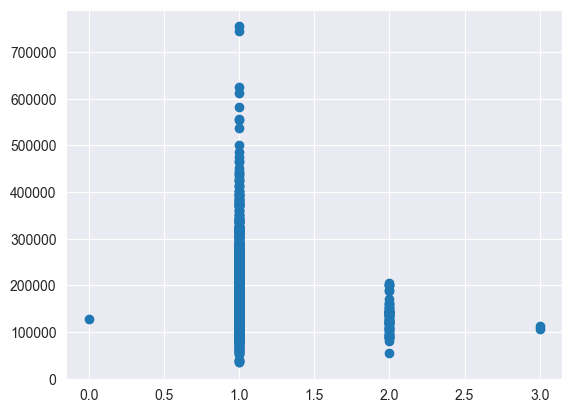

In [247]:
plt.scatter(x= "KitchenAbvGr", y = "SalePrice", data = train_df)

In [248]:
train_df.query("KitchenAbvGr == 3").sort_values("SalePrice", ascending =False)
# drop 48, 810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


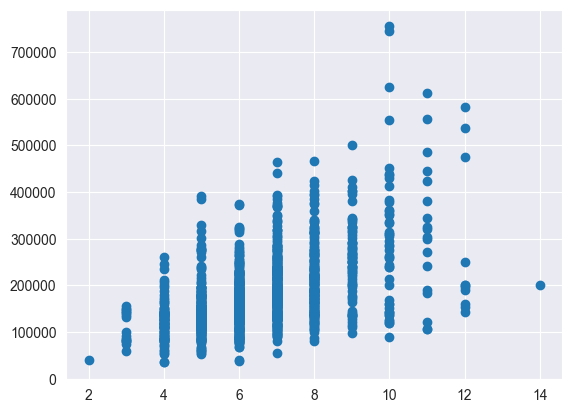

In [249]:
plt.scatter(x= "TotRmsAbvGrd", y = "SalePrice", data = train_df)

In [250]:
train_df.query("TotRmsAbvGrd == 14").sort_values("SalePrice", ascending =False)
# drop 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


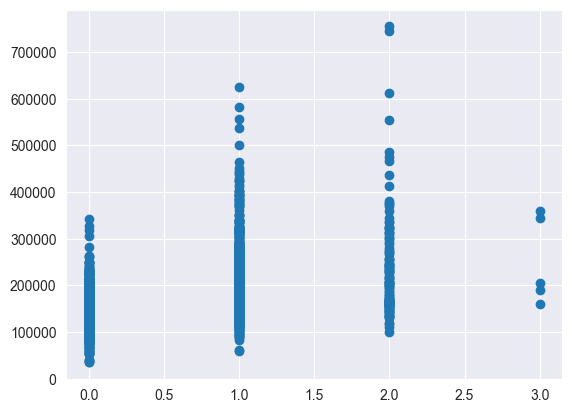

In [251]:
plt.scatter(x= "Fireplaces", y = "SalePrice", data = train_df)

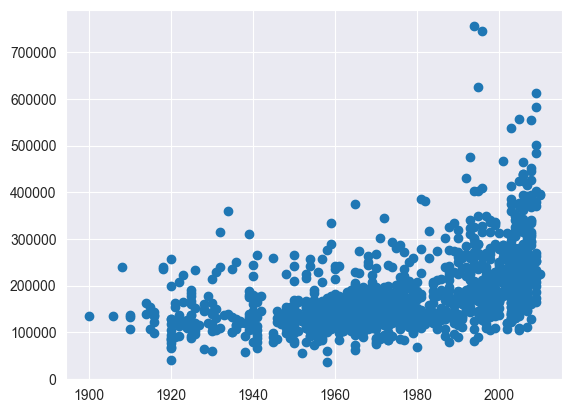

In [252]:
plt.scatter(x= "GarageYrBlt", y = "SalePrice", data = train_df)

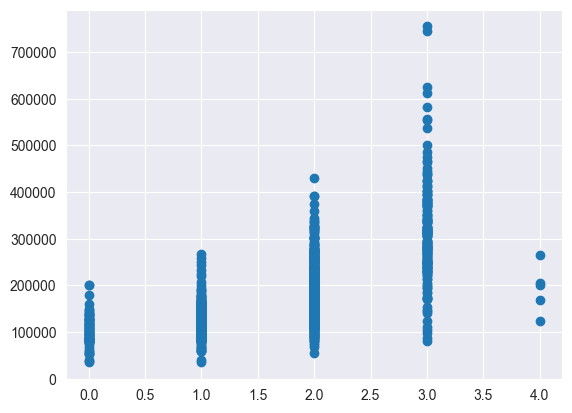

In [253]:
plt.scatter(x= "GarageCars", y = "SalePrice", data = train_df)

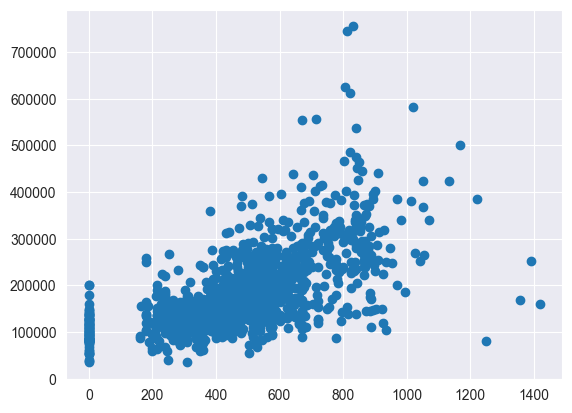

In [254]:
plt.scatter(x= "GarageArea", y = "SalePrice", data = train_df)

In [255]:
train_df.query ("GarageArea > 1200").sort_values("SalePrice", ascending =False)
# drop 1062, 1191

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000


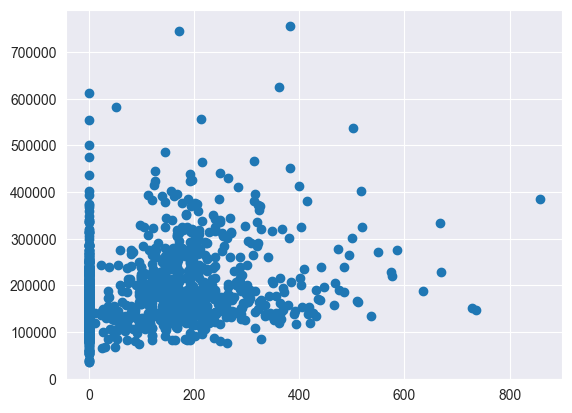

In [256]:
plt.scatter(x= "WoodDeckSF", y = "SalePrice", data = train_df)

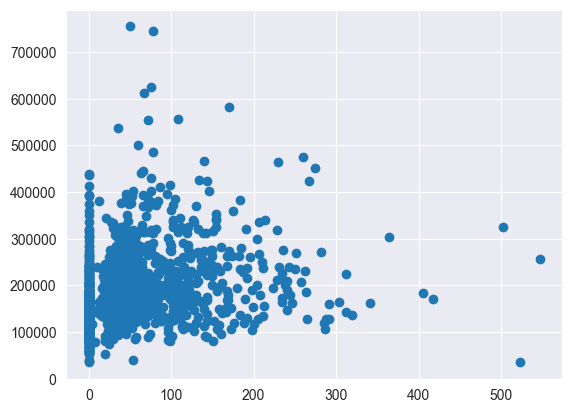

In [257]:
plt.scatter(x= "OpenPorchSF", y = "SalePrice", data = train_df)

In [258]:
train_df.query("OpenPorchSF > 500").sort_values("SalePrice", ascending =False)
# drop 496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900


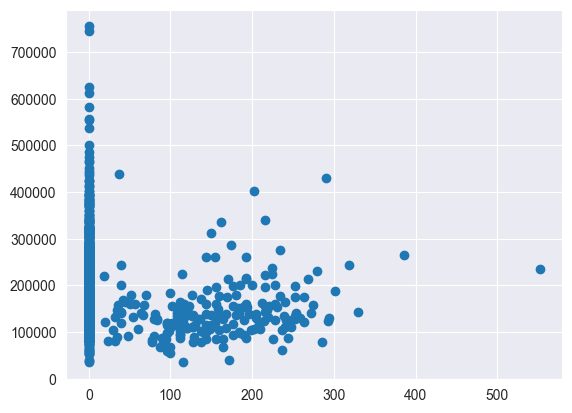

In [259]:
plt.scatter(x= "EnclosedPorch", y = "SalePrice", data = train_df)

In [260]:
train_df.query("EnclosedPorch > 500").sort_values("SalePrice", ascending =False)
# drop 198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


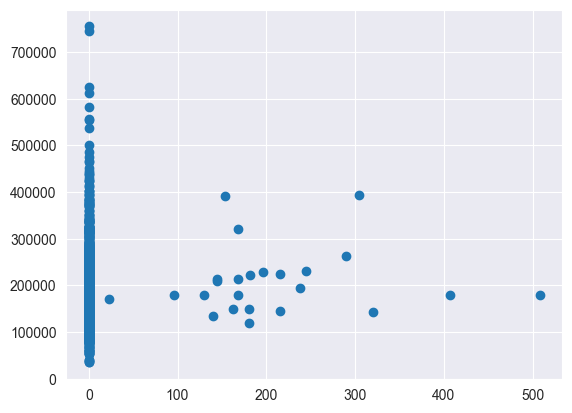

In [261]:
plt.scatter(x= "3SsnPorch", y = "SalePrice", data = train_df)

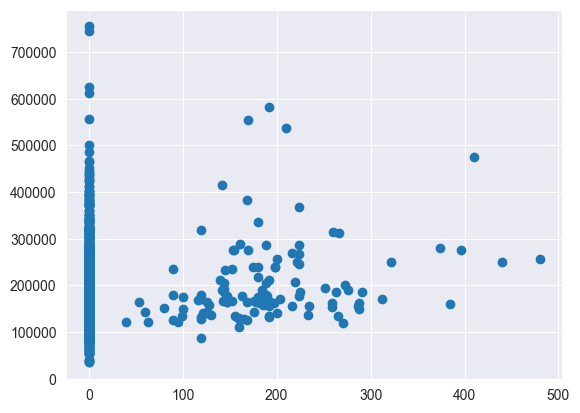

In [262]:
plt.scatter(x= "ScreenPorch", y = "SalePrice", data = train_df)

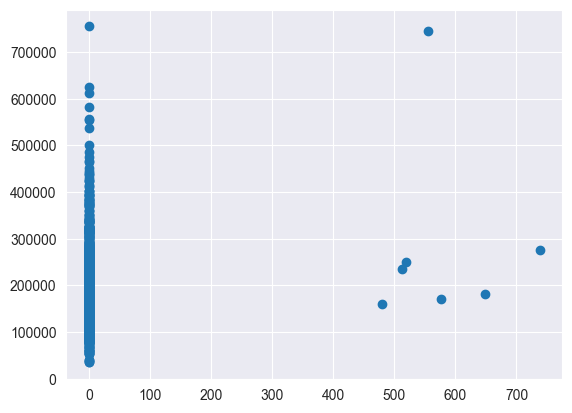

In [263]:
plt.scatter(x= "PoolArea", y = "SalePrice", data = train_df)

In [264]:
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]

In [265]:
train_df = train_df[train_df.Id.isin(values)==False]

In [266]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False))

,0
PoolQC,1435
MiscFeature,1388
Alley,1350
Fence,1162
MasVnrType,861
...,...
ExterQual,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


In [267]:
train_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [268]:
train_df['Alley'].unique()


array([nan, 'Grvl', 'Pave'], dtype=object)

In [269]:
train_df['Alley'].fillna('No',inplace = True)
test_df['Alley'].fillna('No',inplace = True)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/1416094734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Alley'].fillna('No',inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/1416094734.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

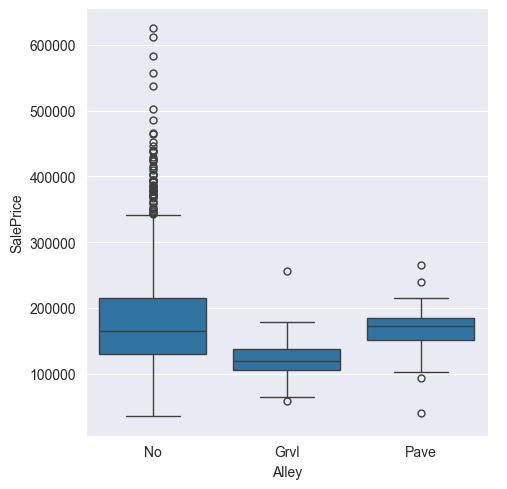

In [270]:
sns.catplot(data= train_df,x='Alley',y='SalePrice',kind='box')

In [271]:
train_df.query('Alley == "Grvl"').count()

Id               49
MSSubClass       49
MSZoning         49
LotFrontage      46
LotArea          49
                 ..
MoSold           49
YrSold           49
SaleType         49
SaleCondition    49
SalePrice        49
Length: 81, dtype: int64

In [272]:
train_df['Fence'].unique()


array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [273]:
train_df['Fence'].fillna('No',inplace = True)
test_df['Fence'].fillna('No',inplace = True)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3155262262.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Fence'].fillna('No',inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3155262262.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

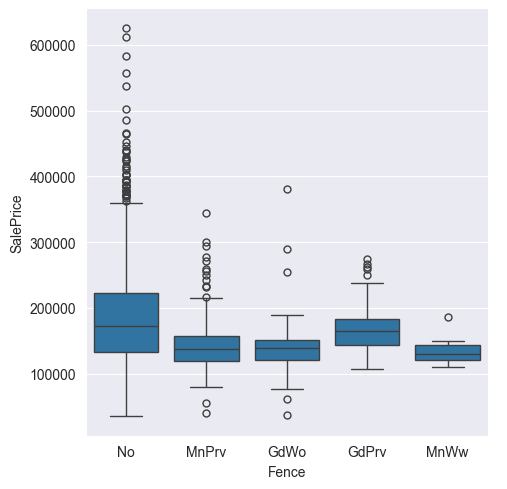

In [274]:
sns.catplot(data= train_df,x='Fence',y='SalePrice',kind='box')


In [275]:
train_df['MasVnrType'].unique()


array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [276]:
train_df['MasVnrType'].fillna('No',inplace = True)
test_df['MasVnrType'].fillna('No',inplace = True)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/861329904.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrType'].fillna('No',inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/861329904.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

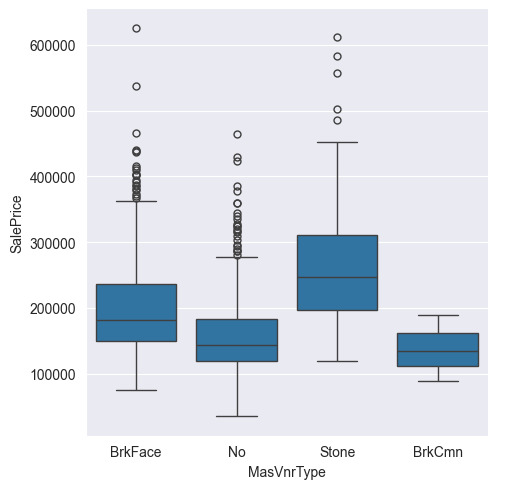

In [277]:
sns.catplot(data= train_df,x='MasVnrType',y='SalePrice',kind='box')


In [278]:
train_df['MasVnrArea'].fillna(0,inplace = True)
test_df['MasVnrArea'].fillna(0,inplace = True)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/434751982.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0,inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/434751982.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [279]:
train_df['FireplaceQu'].unique()


array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [280]:
train_df['FireplaceQu'].fillna('No',inplace = True)
test_df['FireplaceQu'].fillna('No',inplace = True)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3455805559.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['FireplaceQu'].fillna('No',inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3455805559.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

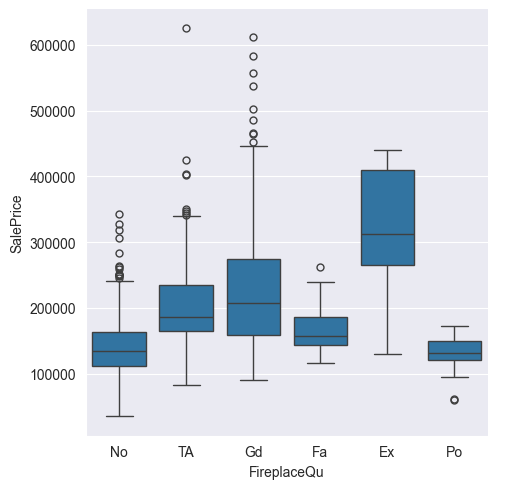

In [281]:
sns.catplot(data= train_df,x='FireplaceQu',y='SalePrice',kind='box')


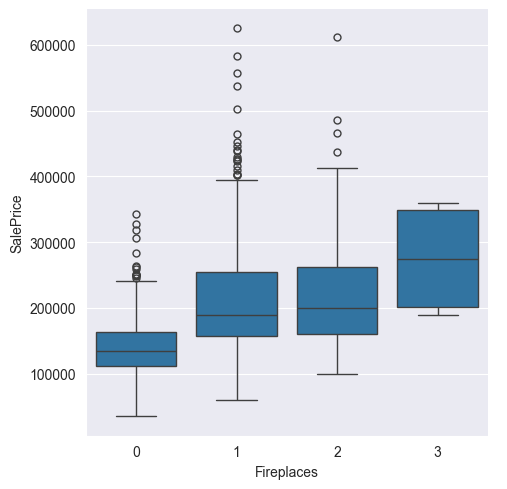

In [282]:
sns.catplot(data= train_df,x='Fireplaces',y='SalePrice',kind='box')

In [283]:
train_df['LotFrontage'].unique()


array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79.,  99.,  67.,
        83.,  43., 103., 174.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106.,  42.,  39., 104., 144., 114.,
       128., 149., 168., 182., 138., 152., 124.,  46.])

In [284]:
train_df['LotFrontage'].fillna(0,inplace = True)
test_df['LotFrontage'].fillna(0,inplace = True)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/1122461580.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LotFrontage'].fillna(0,inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/1122461580.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [285]:
train_df['GarageYrBlt'].corr(train_df['YearBuilt'])

np.float64(0.8289827595060576)

In [286]:
train_df['GarageCond'].unique()


array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [287]:
train_df['GarageCond'].fillna('No',inplace = True)
test_df['GarageCond'].fillna('No',inplace = True)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3188016923.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageCond'].fillna('No',inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3188016923.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

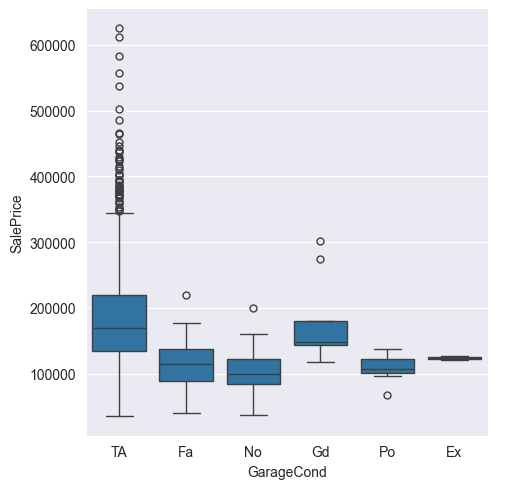

In [288]:
sns.catplot(data= train_df,x='GarageCond',y='SalePrice',kind='box')

In [289]:
train_df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [290]:
train_df['GarageType'].fillna('No',inplace = True)
test_df['GarageType'].fillna('No',inplace = True)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/960687623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageType'].fillna('No',inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/960687623.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

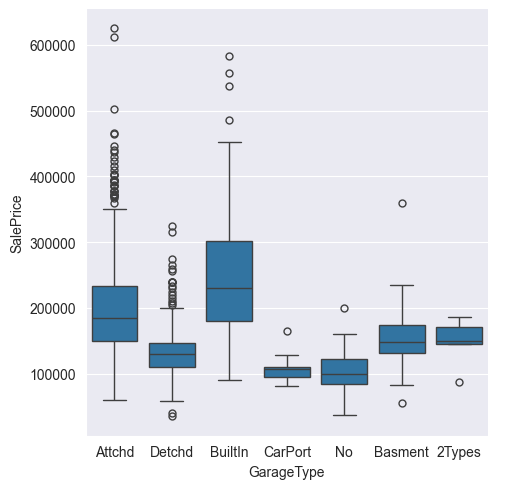

In [291]:
sns.catplot(data= train_df,x='GarageType',y='SalePrice',kind='box')


In [292]:
train_df['GarageFinish'].unique()


array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [293]:
train_df['GarageFinish'].fillna('No',inplace = True)
test_df['GarageFinish'].fillna('No',inplace = True)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3624944650.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageFinish'].fillna('No',inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3624944650.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

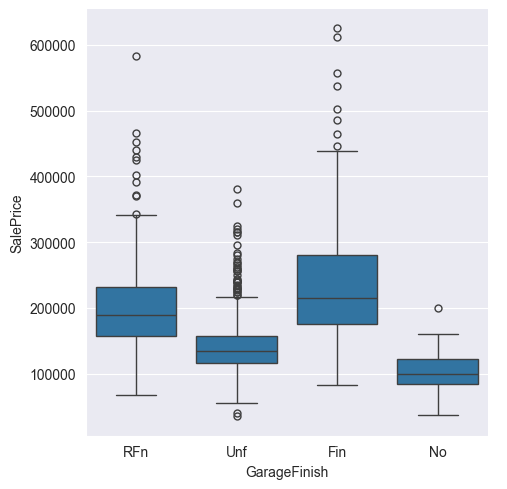

In [294]:
sns.catplot(data= train_df,x='GarageFinish',y='SalePrice',kind='box')


In [295]:
train_df['GarageQual'].unique()


array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [296]:
train_df['GarageQual'].fillna('No',inplace = True)
test_df['GarageQual'].fillna('No',inplace = True)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3413316051.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageQual'].fillna('No',inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3413316051.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

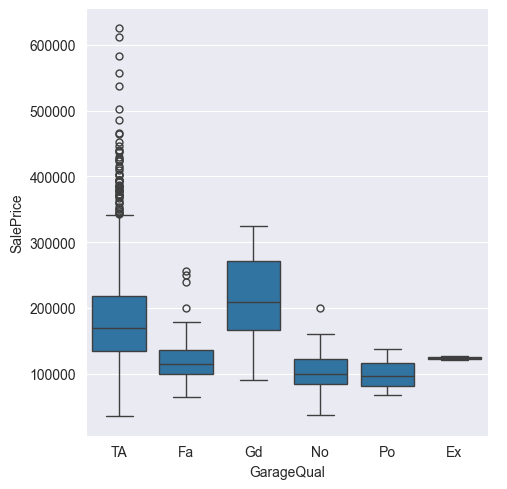

In [297]:
sns.catplot(data= train_df,x='GarageQual',y='SalePrice',kind='box')


In [298]:
train_df['BsmtFinType2'].unique()


array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [299]:
train_df['BsmtFinType2'].fillna('Unf',inplace = True)
test_df['BsmtFinType2'].fillna('Unf',inplace = True)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3237320606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType2'].fillna('Unf',inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3237320606.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

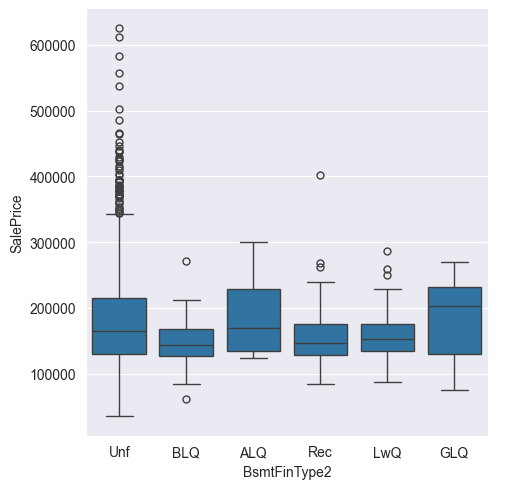

In [300]:
sns.catplot(data= train_df,x='BsmtFinType2',y='SalePrice',kind='box')


In [301]:
train_df['BsmtExposure'].unique()


array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [302]:
train_df['BsmtExposure'].fillna('No',inplace = True)
test_df['BsmtExposure'].fillna('No',inplace = True)


/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/1382568569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtExposure'].fillna('No',inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/1382568569.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [303]:
train_df['BsmtQual'].unique()


array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [304]:
train_df['BsmtQual'].fillna('No',inplace = True)
test_df['BsmtQual'].fillna('No',inplace = True)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3680247698.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtQual'].fillna('No',inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3680247698.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

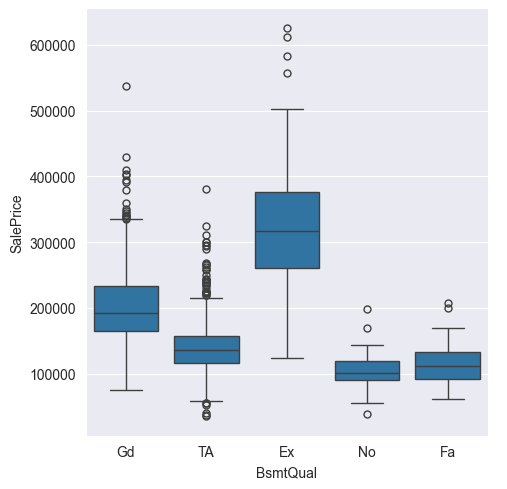

In [305]:
sns.catplot(data= train_df,x='BsmtQual',y='SalePrice',kind='box')


In [306]:
train_df['BsmtCond'].unique()


array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [307]:
train_df['BsmtCond'].fillna('No',inplace = True)
test_df['BsmtCond'].fillna('No',inplace = True)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3647486491.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtCond'].fillna('No',inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3647486491.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

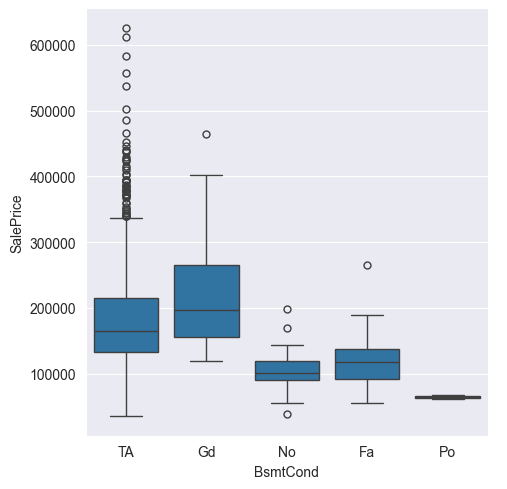

In [308]:
sns.catplot(data= train_df,x='BsmtCond',y='SalePrice',kind='box')


In [309]:
train_df['BsmtFinType1'].unique()


array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [310]:
train_df['BsmtFinType1'].fillna('Unf',inplace = True)
test_df['BsmtFinType1'].fillna('Unf',inplace = True)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3642876884.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType1'].fillna('Unf',inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3642876884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

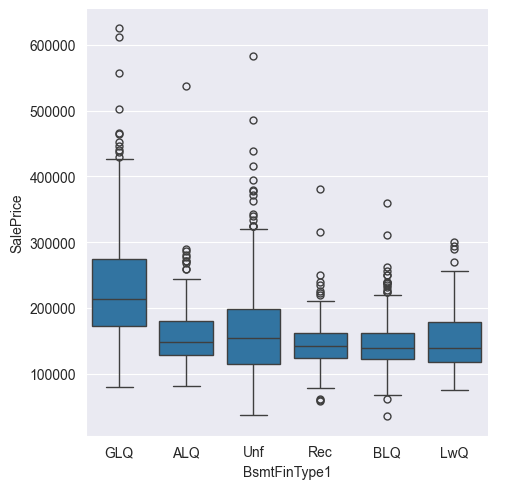

In [311]:
sns.catplot(data= train_df,x='BsmtFinType1',y='SalePrice',kind='box')


In [312]:
train_df['MasVnrArea'].unique()


array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [313]:
train_df['MasVnrArea'].fillna(0,inplace = True)
test_df['MasVnrArea'].fillna(0,inplace = True)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/434751982.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0,inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/434751982.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

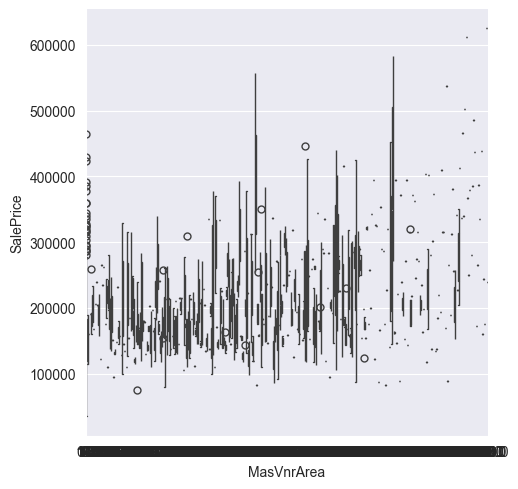

In [314]:
sns.catplot(data= train_df,x='MasVnrArea',y='SalePrice',kind='box')


In [315]:
train_df['Electrical'].unique()


array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [316]:
train_df['Electrical'].fillna('SBrkr',inplace = True)
test_df['Electrical'].fillna('SBrkr',inplace = True)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/2392532589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Electrical'].fillna('SBrkr',inplace = True)
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/2392532589.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [317]:
train_df = train_df.drop(columns = ['PoolQC','MiscFeature','Alley','Fence','GarageYrBlt','GarageCond','BsmtFinType2'])
test_df = test_df.drop(columns = ['PoolQC','MiscFeature','Alley','Fence','GarageYrBlt','GarageCond','BsmtFinType2'])


#feature engineering


In [318]:
train_df['housage'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['housage'] = test_df['YrSold'] - test_df['YearBuilt']



In [319]:
train_df['houseremodelage'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['houseremodelage'] = test_df['YrSold'] - test_df['YearRemodAdd']


In [320]:
train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
test_df['totalsf'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']


In [321]:
train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']


In [322]:
train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath'])
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath'])



In [323]:
train_df['totalporchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df['totalporchsf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + train_df['WoodDeckSF']


In [324]:
train_df = train_df.drop(columns = ['YrSold','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2', 'TotalBsmtSF','GrLivArea','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch', 'WoodDeckSF'])
test_df = test_df.drop(columns = ['Id','YrSold','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2', 'TotalBsmtSF','GrLivArea','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch', 'WoodDeckSF'])

<Axes: >

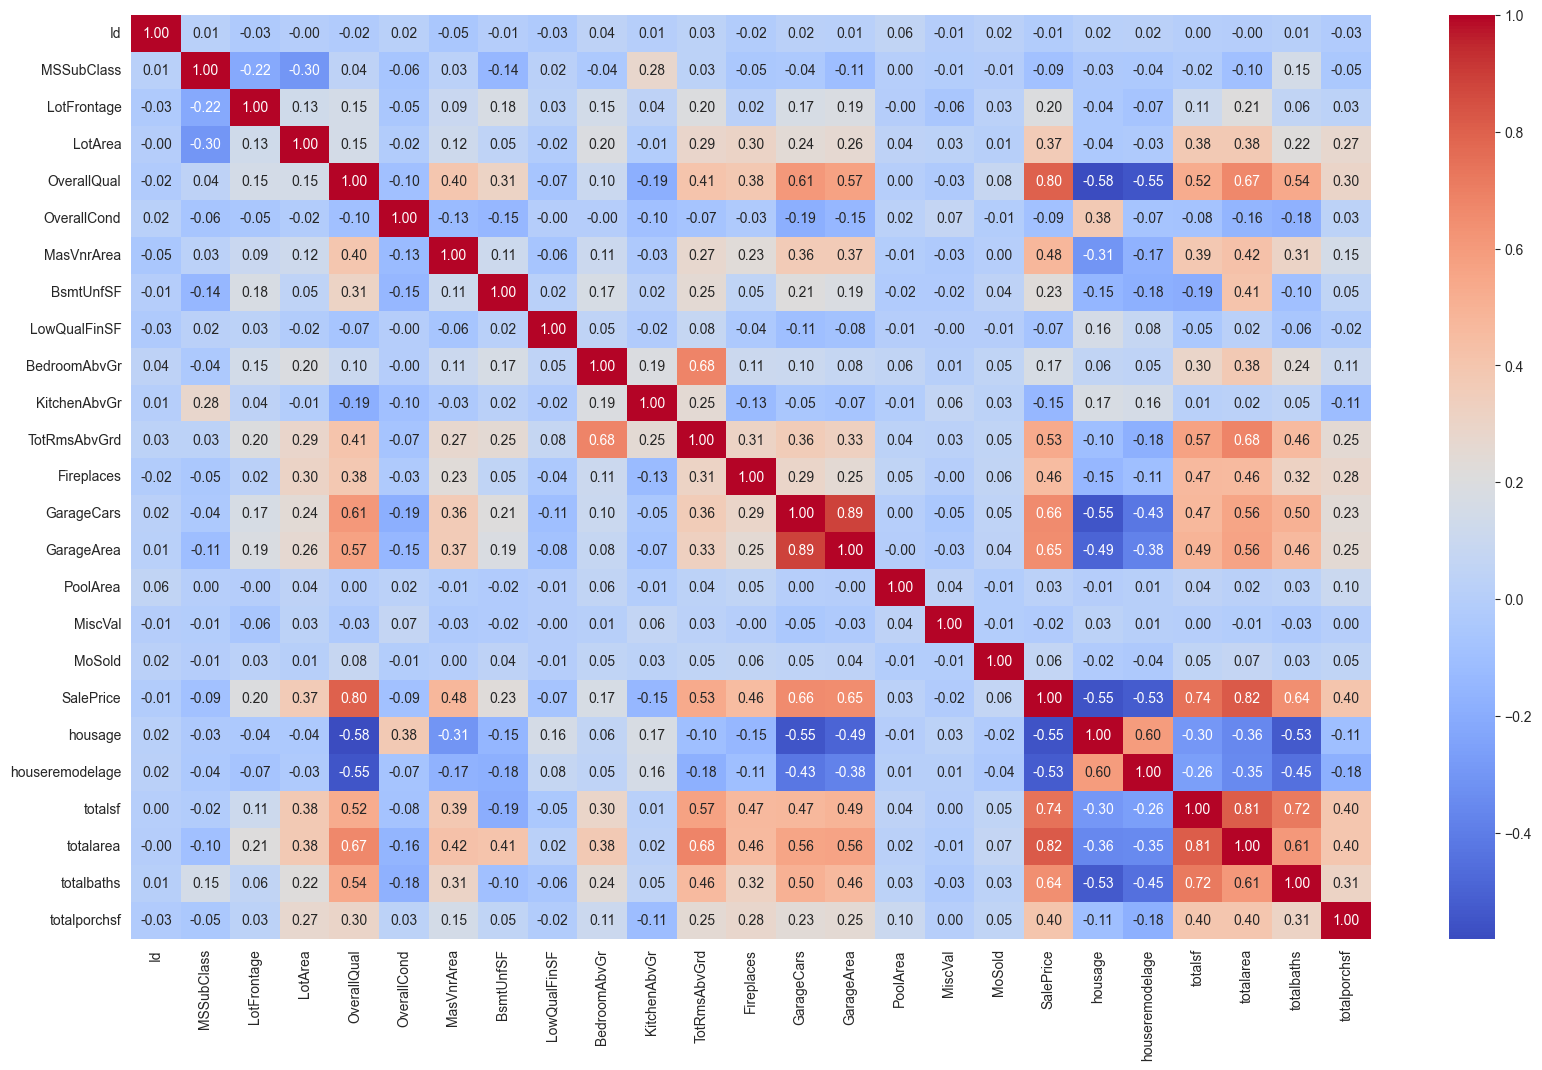

In [325]:
correlation_matrix = train_df.corr(numeric_only = True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm', fmt = '.2f')

In [326]:
#drop GarageArea or GarageCars
train_df = train_df.drop(columns = ['GarageArea'])
test_df = test_df.drop(columns = ['GarageArea'])

<Axes: xlabel='SalePrice', ylabel='Count'>

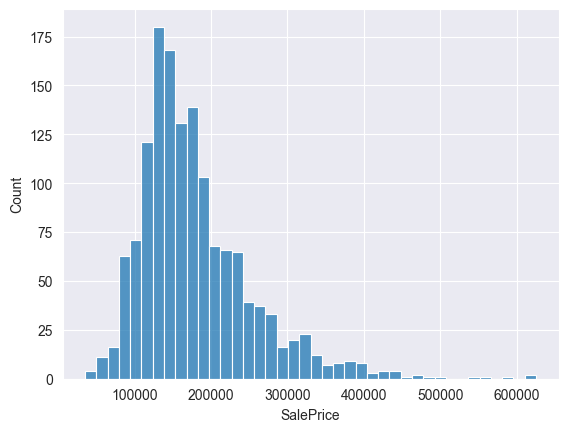

In [327]:
sns.histplot(
    train_df,
    x = train_df['SalePrice']
)

In [328]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

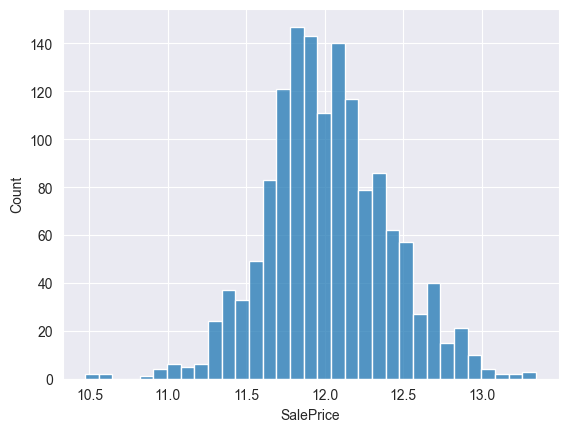

In [329]:
sns.histplot(
    train_df,
    x = train_df['SalePrice']
)

In [330]:
train_df.dtypes[train_df.dtypes == 'object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [331]:
train_df.dtypes[train_df.dtypes != 'object']


Id                   int64
MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea         float64
BsmtUnfSF            int64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
PoolArea             int64
MiscVal              int64
MoSold               int64
SalePrice          float64
housage              int64
houseremodelage      int64
totalsf              int64
totalarea            int64
totalbaths         float64
totalporchsf         int64
dtype: object

In [332]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional',
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [333]:
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [334]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

In [335]:
num_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [336]:
ode_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value = -1))
])


In [337]:
ohe_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])


In [338]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
    ('ode_p', ode_pipeline, ode_cols),
])

In [339]:
pipeline = Pipeline(steps = [
    ('preprocessing', col_trans)
])

In [340]:
X = train_df.drop('SalePrice', axis = 1)
y = train_df['SalePrice']

In [341]:
X_preprocessed = pipeline.fit_transform(X)

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size = 0.2, random_state = 25)

In [343]:
#build models
lr = LinearRegression()

In [344]:
lr.fit(X_train, y_train)

LinearRegression()

In [345]:
y_pred_lr = lr.predict(X_test)

In [346]:
mean_squared_error(y_test, y_pred_lr)

0.01771986450277398

In [347]:
RFR = RandomForestRegressor(random_state=13)


In [348]:
param_grid_RFR = {
    'max_depth': [5,10,15],
    'n_estimators' : [100,250,500],
    'min_samples_split': [3,5,10]
}

In [349]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [350]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [351]:
y_pref_rfr = rfr_cv.predict(X_test)

In [352]:
mean_squared_error(y_test, y_pref_rfr)

0.01965220357400245

In [353]:
np.sqrt(-1 * rfr_cv.best_score_)

np.float64(0.134601066647923)

In [354]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 500}

In [355]:
XGB = XGBRegressor(random_state=13)


In [356]:
param_grid_xgb = {
    'learning_rate': [0.05,0.1,0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0,0.1,0.2],
    'subsample': [0.8,0.9,1.0],
    'colsample_bytree': [0.8,0.9,1.0],
}

In [357]:
xgb_cv = GridSearchCV(XGB, param_grid_xgb, cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [358]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=13, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [359]:
np.sqrt(-1 * xgb_cv.best_score_)

np.float64(0.11838347260328452)

In [360]:
ridge = Ridge(random_state=13)


In [361]:
param_grid_ridge = {
    'alpha': [0.05,0.1,1,3,5,10],
    'solver': ['auto','svd','lsqr','cholesky','sparse_cg','sag']
}

In [362]:
ridge_cv = GridSearchCV(ridge,param_grid_ridge,cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [363]:
ridge_cv.fit(X_train, y_train)

/Users/kazimir/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kazimir/Library/Python/

GridSearchCV(cv=3, estimator=Ridge(random_state=13), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'lsqr', 'cholesky',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [364]:
np.sqrt(-1 * ridge_cv.best_score_)

np.float64(0.10981913016578367)

In [365]:
GBR = GradientBoostingRegressor(random_state=13)

In [366]:
param_grid_GBR = {
    'max_depth': [12,15,20],
    'n_estimators': [200,300,1000],
    'min_samples_leaf': [10,25,50],
    'learning_rate': [0.001,0.01,0.1],
    'max_features': [0.01,0.1,0.7],
}

In [367]:
GBR_cv = GridSearchCV(GBR,param_grid_GBR,cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)


In [368]:
GBR_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=13),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [369]:
np.sqrt(-1 * GBR_cv.best_score_)


np.float64(0.11410471440718944)

In [370]:
lgbm_regressor = lgb.LGBMRegressor(random_state=13)

In [371]:
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}


In [372]:
LGBM_cv = GridSearchCV(lgbm_regressor,param_grid_lgbm,cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1)


In [391]:
LGBM_cv.fit(X_train, y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [374]:
np.sqrt(-1 * LGBM_cv.best_score_)


np.float64(0.1272920168429205)

In [375]:
vr = VotingRegressor([('gbr', GBR_cv.best_estimator_),
                      ('xgb', xgb_cv.best_estimator_),
                      ('ridge', ridge_cv.best_estimator_),],
                     weights = [2,3,1])

In [376]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=12,
                                                       max_features=0.1,
                                                       min_samples_leaf=25,
                                                       n_estimators=1000,
                                                       random_state=13)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categori...
                                          learning_rate=0.05, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None, min_child_weight=2,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=13, ...)),
                            ('ridge',
                             Ridge(alpha=10, random_state=13,
                                   solver='sparse_cg'))],
                weights=[2, 3, 1])

In [377]:
y_prediction_vr = vr.predict(X_test)

In [378]:
print(np.sqrt(mean_squared_error(y_test, y_prediction_vr)))

0.11966261762862418


In [379]:
catboost = CatBoostRegressor(loss_function='RMSE', verbose = False)

In [380]:
param_grid_cat = {
    'iterations': [100,500,1000],
    'depth' : [4,6,8,10],
    'learning_rate': [0.01,0.05,0.1,0.5]
}

In [381]:
CAT_cv = GridSearchCV(catboost,param_grid_cat,cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [382]:
CAT_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x1524110a0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [383]:
np.sqrt(-1 * CAT_cv.best_score_)

np.float64(0.11457402492740384)

In [384]:
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xbg', xgb_cv.best_estimator_),
    ('car', CAT_cv.best_estimator_),
    ('lgbm', LGBM_cv.best_estimator_),
    ('RFR', rfr_cv.best_estimator_),
]

In [385]:
stackreg = StackingRegressor(
    estimators = estimators,
    final_estimator = vr
)

In [386]:
stackreg.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2249
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 113
[LightGBM] [Info] Start training from score 12.023259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2151
[LightGBM] [Info] Number of data points in the train set: 920, number of used features: 107
[LightGBM] [Info] Start training from score 12.032469


/Users/kazimir/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2139
[LightGBM] [Info] Number of data points in the train set: 921, number of used features: 108
[LightGBM] [Info] Start training from score 12.018337


/Users/kazimir/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2149
[LightGBM] [Info] Number of data points in the train set: 921, number of used features: 109
[LightGBM] [Info] Start training from score 12.020647


/Users/kazimir/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2141
[LightGBM] [Info] Number of data points in the train set: 921, number of used features: 109
[LightGBM] [Info] Start training from score 12.021127


/Users/kazimir/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2143
[LightGBM] [Info] Number of data points in the train set: 921, number of used features: 110
[LightGBM] [Info] Start training from score 12.023724


/Users/kazimir/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=12,
                                                         max_features=0.1,
                                                         min_samples_leaf=25,
                                                         n_estimators=1000,
                                                         random_state=13)),
                              ('xbg',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_catego...
                                                                            learning_rate=0.05,
                                                                            max_bin=None,
                                                                            max_cat_threshold=None,
                                                                            max_cat_to_onehot=None,
                                                                            max_delta_step=None,
                                                                            max_depth=3,
                                                                            max_leaves=None,
                                                                            min_child_weight=2,
                                                                            missing=nan,
                                                                            monotone_constraints=None,
                                                                            multi_strategy=None,
                                                                            n_estimators=300,
                                                                            n_jobs=None,
                                                                            num_parallel_tree=None,
                                                                            random_state=13, ...)),
                                                              ('ridge',
                                                               Ridge(alpha=10,
                                                                     random_state=13,
                                                                     solver='sparse_cg'))],
                                                  weights=[2, 3, 1]))

In [387]:
y_pred_stack = stackreg.predict(X_test)

/Users/kazimir/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [388]:
print(np.sqrt(mean_squared_error(y_test, y_pred_stack)))


0.11772947895676324


In [389]:
df_test_preprocess = pipeline.transform(test_df)

In [390]:
y_stacking = np.exp(stackreg.predict(X_test))

df_y_stacking_out = test_df['Id']
df_y_stacking_out['SalePrice'] = y_stacking

df_y_stacking_out.to_csv('HousePrecitionStacking1028.csv', index = False)

/Users/kazimir/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_23920/3376534893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_stacking_out['SalePrice'] = y_stacking
